# Bayes Method

#### This notebook explores different examples of naive bayes

## nb.py

In [1]:
# This is an example of a Naive Bayes classifier on MNIST data.
from __future__ import print_function, division
from future.utils import iteritems
from builtins import range, input

import numpy as np
from util import get_data
from datetime import datetime
from scipy.stats import norm
from scipy.stats import multivariate_normal as mvn

class NaiveBayes(object):
    def fit(self, X, Y, smoothing=1e-2):
        self.gaussians = dict()
        self.priors = dict()
        labels = set(Y)
        for c in labels:
            current_x = X[Y == c]
            self.gaussians[c] = {
                'mean': current_x.mean(axis=0),
                'var': current_x.var(axis=0) + smoothing,
            }
            self.priors[c] = float(len(Y[Y == c])) / len(Y)

    def score(self, X, Y):
        P = self.predict(X)
        return np.mean(P == Y)

    def predict(self, X):
        N, D = X.shape
        K = len(self.gaussians)
        P = np.zeros((N, K))
        for c, g in iteritems(self.gaussians):
            mean, var = g['mean'], g['var']
            P[:,c] = mvn.logpdf(X, mean=mean, cov=var) + np.log(self.priors[c])
        return np.argmax(P, axis=1)


if __name__ == '__main__':
    X, Y = get_data(10000)
    Ntrain = len(Y) // 2
    Xtrain, Ytrain = X[:Ntrain], Y[:Ntrain]
    Xtest, Ytest = X[Ntrain:], Y[Ntrain:]

    model = NaiveBayes()
    t0 = datetime.now()
    model.fit(Xtrain, Ytrain)
    print("Training time:", (datetime.now() - t0))

    t0 = datetime.now()
    print("Train accuracy:", model.score(Xtrain, Ytrain))
    print("Time to compute train accuracy:", (datetime.now() - t0), "Train size:", len(Ytrain))

    t0 = datetime.now()
    print("Test accuracy:", model.score(Xtest, Ytest))
    print("Time to compute test accuracy:", (datetime.now() - t0), "Test size:", len(Ytest))


Reading in and transforming data...
Training time: 0:00:00.084000
Train accuracy: 0.8114
Time to compute train accuracy: 0:00:02.560000 Train size: 5000
Test accuracy: 0.8
Time to compute test accuracy: 0:00:02.553000 Test size: 5000


## multinomialnb.py

In [2]:
# This is an example of a Naive Bayes classifier on MNIST data.
from __future__ import print_function, division
from future.utils import iteritems
from builtins import range, input

import numpy as np
from util import get_data
from datetime import datetime

class MultinomialNB(object):
    def fit(self, X, Y, smoothing=1.0):
        # one-hot encode Y
        K = len(set(Y)) # number of classes
        N = len(Y) # number of samples
        labels = Y
        Y = np.zeros((N, K))
        Y[np.arange(N), labels] = 1

        # D x K matrix of feature counts
        # feature_counts[d,k] = count of feature d in class k
        feature_counts = X.T.dot(Y) + smoothing
        class_counts = Y.sum(axis=0)

        self.weights = np.log(feature_counts) - np.log(feature_counts.sum(axis=0))
        self.priors = np.log(class_counts) - np.log(class_counts.sum())

    def score(self, X, Y):
        P = self.predict(X)
        return np.mean(P == Y)

    def predict(self, X):
        P = X.dot(self.weights) + self.priors
        return np.argmax(P, axis=1)


if __name__ == '__main__':
    X, Y = get_data(10000)
    Ntrain = len(Y) // 2
    Xtrain, Ytrain = X[:Ntrain], Y[:Ntrain]
    Xtest, Ytest = X[Ntrain:], Y[Ntrain:]

    model = MultinomialNB()
    t0 = datetime.now()
    model.fit(Xtrain, Ytrain)
    print("Training time:", (datetime.now() - t0))

    t0 = datetime.now()
    print("Train accuracy:", model.score(Xtrain, Ytrain))
    print("Time to compute train accuracy:", (datetime.now() - t0), "Train size:", len(Ytrain))

    t0 = datetime.now()
    print("Test accuracy:", model.score(Xtest, Ytest))
    print("Time to compute test accuracy:", (datetime.now() - t0), "Test size:", len(Ytest))


Reading in and transforming data...
Training time: 0:00:00.031000
Train accuracy: 0.8298
Time to compute train accuracy: 0:00:00.038000 Train size: 5000
Test accuracy: 0.8122
Time to compute test accuracy: 0:00:00.031000 Test size: 5000


## bayes.py

#### Note that this is similar to the Naive Bayes classifier code but changes to use covariance in place of variance.


            self.gaussians[c] = {
                'mean': current_x.mean(axis=0),
                'var': current_x.var(axis=0) + smoothing,
            }
            
becomes

            self.gaussians[c] = {
                'mean': current_x.mean(axis=0),
                'cov': np.cov(current_x.T) + np.eye(D)*smoothing,
            }
            
and

        for c, g in iteritems(self.gaussians):
            mean, var = g['mean'], g['var']
            P[:,c] = mvn.logpdf(X, mean=mean, cov=var) + np.log(self.priors[c])

becomes

        for c, g in iteritems(self.gaussians):
            mean, cov = g['mean'], g['cov']
            P[:,c] = mvn.logpdf(X, mean=mean, cov=cov) + np.log(self.priors[c])

Reading in and transforming data...
Training time: 0:00:00.285000
Train accuracy: 0.998
Time to compute train accuracy: 0:00:02.667000 Train size: 5000
Test accuracy: 0.9408
Time to compute test accuracy: 0:00:02.637000 Test size: 5000


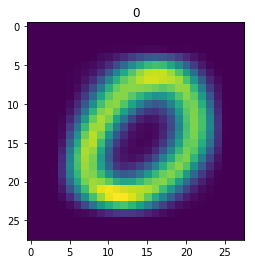

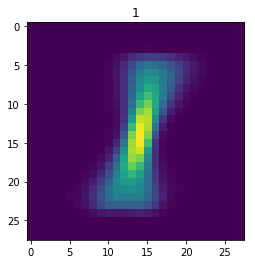

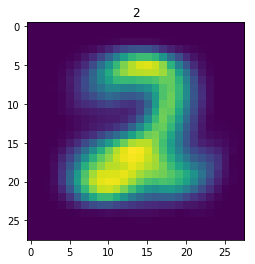

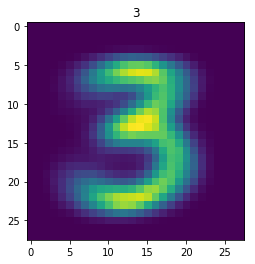

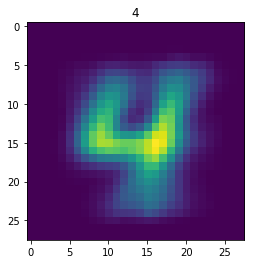

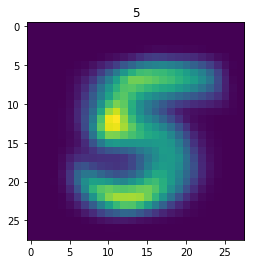

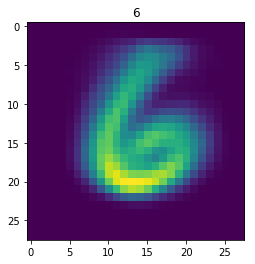

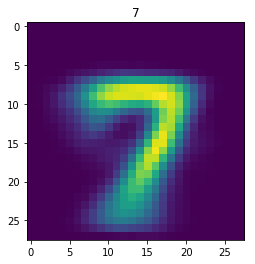

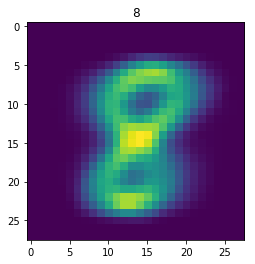

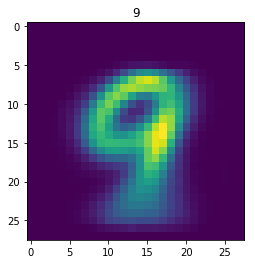

In [3]:
# This is an example of a Bayes classifier on MNIST data.
from __future__ import print_function, division
from future.utils import iteritems
from builtins import range, input

import numpy as np
import matplotlib.pyplot as plt
from util import get_data
from datetime import datetime
from scipy.stats import norm
from scipy.stats import multivariate_normal as mvn

class Bayes(object):
    def fit(self, X, Y, smoothing=1e-2):
        N, D = X.shape
        self.gaussians = dict()
        self.priors = dict()
        labels = set(Y)
        for c in labels:
            current_x = X[Y == c]
            self.gaussians[c] = {
                'mean': current_x.mean(axis=0),
                'cov': np.cov(current_x.T) + np.eye(D)*smoothing,
            }
            self.priors[c] = float(len(Y[Y == c])) / len(Y)

    def score(self, X, Y):
        P = self.predict(X)
        return np.mean(P == Y)

    def predict(self, X):
        N, D = X.shape
        K = len(self.gaussians)
        P = np.zeros((N, K))
        for c, g in iteritems(self.gaussians):
            mean, cov = g['mean'], g['cov']
            P[:,c] = mvn.logpdf(X, mean=mean, cov=cov) + np.log(self.priors[c])
        return np.argmax(P, axis=1)


if __name__ == '__main__':
    X, Y = get_data(10000)
    Ntrain = len(Y) // 2
    Xtrain, Ytrain = X[:Ntrain], Y[:Ntrain]
    Xtest, Ytest = X[Ntrain:], Y[Ntrain:]

    model = Bayes()
    t0 = datetime.now()
    model.fit(Xtrain, Ytrain)
    print("Training time:", (datetime.now() - t0))

    t0 = datetime.now()
    print("Train accuracy:", model.score(Xtrain, Ytrain))
    print("Time to compute train accuracy:", (datetime.now() - t0), "Train size:", len(Ytrain))

    t0 = datetime.now()
    print("Test accuracy:", model.score(Xtest, Ytest))
    print("Time to compute test accuracy:", (datetime.now() - t0), "Test size:", len(Ytest))

    # plot the mean of each class
    for c, g in iteritems(model.gaussians):
        plt.imshow(g['mean'].reshape(28, 28))
        plt.title(c)
        plt.show()
